<a href="https://colab.research.google.com/github/llaramar/Challenge-AmigoSecreto/blob/main/Challenge_Telecom2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Requerimientos
Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico


In [2]:
import pandas as pd

Datos =pd.read_csv('/content/TelecomX2.csv')

In [3]:
Datos.sample(3)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7096,9773-PEQBZ,0,1,0,0,0,10,1,1,Fiber optic,...,1,0,0,0,0,Month-to-month,0,Electronic check,79.85,797.25
2944,4086-YQSNZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,0,1,0,Month-to-month,1,Electronic check,80.40,224.05
4125,5651-WYIPH,0,0,1,0,0,18,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Credit card (automatic),49.85,865.75


In [4]:
Datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer_gender            7267 non-null   int64  
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   int64  
 5   customer_Dependents        7267 non-null   int64  
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   int64  
 8   phone_MultipleLines        7267 non-null   int64  
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   int64  
 11  internet_OnlineBackup      7267 non-null   int64  
 12  internet_DeviceProtection  7267 non-null   int64  
 13  internet_TechSupport       7267 non-null   int64

In [5]:
# Verificar si hay valores unicos en las columnas
for col in Datos.columns:
  print(f"valores unicos en la columna '{col}': {Datos[col].nunique()}")
  if Datos[col].nunique() < 50:
    print(Datos[col].unique())
    print('-' * 50)

valores unicos en la columna 'customerID': 7267
valores unicos en la columna 'Churn': 2
[0 1]
--------------------------------------------------
valores unicos en la columna 'customer_gender': 2
[0 1]
--------------------------------------------------
valores unicos en la columna 'customer_SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores unicos en la columna 'customer_Partner': 2
[1 0]
--------------------------------------------------
valores unicos en la columna 'customer_Dependents': 2
[1 0]
--------------------------------------------------
valores unicos en la columna 'customer_tenure': 73
valores unicos en la columna 'phone_PhoneService': 2
[1 0]
--------------------------------------------------
valores unicos en la columna 'phone_MultipleLines': 2
[0 1]
--------------------------------------------------
valores unicos en la columna 'internet_InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valore

In [6]:
Datos.isnull().sum()


,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [7]:
filas_con_nulos = Datos[Datos['account_Charges_Total'].isnull()]
filas_con_nulos

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
975,1371-DWPAZ,0,0,0,1,1,0,0,0,DSL,...,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,0,0,0,1,1,0,1,0,No,...,0,0,0,0,0,Two year,0,Mailed check,20.00,NaN
1955,2775-SEFEE,0,1,0,0,1,0,1,1,DSL,...,1,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,0,1,0,1,1,0,1,0,No,...,0,0,0,0,0,One year,1,Mailed check,19.70,NaN
2232,3115-CZMZD,0,1,0,0,1,0,1,0,No,...,0,0,0,0,0,Two year,0,Mailed check,20.25,NaN
2308,3213-VVOLG,0,1,0,1,1,0,1,1,No,...,0,0,0,0,0,Two year,0,Mailed check,25.35,NaN
2930,4075-WKNIU,0,0,0,1,1,0,1,1,DSL,...,1,1,1,1,0,Two year,0,Mailed check,73.35,NaN
3134,4367-NUYAO,0,1,0,1,1,0,1,1,No,...,0,0,0,0,0,Two year,0,Mailed check,25.75,NaN
3203,4472-LVYGI,0,0,0,1,1,0,0,0,DSL,...,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,0,0,0,1,1,0,1,0,DSL,...,1,1,0,1,1,Two year,0,Mailed check,80.85,NaN


In [8]:
Datos.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
1005,1407-DIGZV,0,0,0,1,1,3,1,0,No,...,0,0,0,0,0,Two year,0,Mailed check,19.10,52.00
4583,6283-GITPX,0,1,0,0,1,71,1,0,DSL,...,1,1,1,1,0,Two year,1,Credit card (automatic),76.90,5522.70
5137,7014-ZZXAW,0,0,0,1,0,71,1,1,No,...,0,0,0,0,0,Two year,1,Credit card (automatic),24.25,1732.95
3506,4830-FAXFM,0,1,0,0,1,19,1,1,No,...,0,0,0,0,0,Month-to-month,1,Credit card (automatic),24.10,439.20
6788,9365-CSLBQ,0,1,0,0,1,71,1,1,No,...,0,0,0,0,0,Two year,0,Mailed check,24.35,1654.60
5632,7691-XVTZH,0,0,0,1,0,68,1,1,Fiber optic,...,0,1,0,1,0,Two year,1,Bank transfer (automatic),89.95,5974.30
724,1038-RQOST,0,1,0,1,1,19,1,0,No,...,0,0,0,0,0,Month-to-month,0,Mailed check,20.60,414.95
5894,8058-DMYRU,0,1,1,0,0,54,1,1,Fiber optic,...,1,0,0,0,1,Month-to-month,1,Electronic check,90.05,4931.80
5450,7469-LKBCI,0,1,0,0,0,16,1,0,No,...,0,0,0,0,0,Two year,0,Credit card (automatic),18.95,326.80
1062,1488-PBLJN,0,0,0,1,1,72,1,1,Fiber optic,...,1,1,1,1,1,Two year,1,Bank transfer (automatic),116.85,8477.70


### Eliminando las filas con nulos

In [9]:
datos = Datos.dropna(subset=['account_Charges_Total'])

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   int64  
 2   customer_gender            7256 non-null   int64  
 3   customer_SeniorCitizen     7256 non-null   int64  
 4   customer_Partner           7256 non-null   int64  
 5   customer_Dependents        7256 non-null   int64  
 6   customer_tenure            7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   int64  
 8   phone_MultipleLines        7256 non-null   int64  
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   int64  
 11  internet_OnlineBackup      7256 non-null   int64  
 12  internet_DeviceProtection  7256 non-null   int64  
 13  internet_TechSupport       7256 non-null   int64  
 1

##Explotacion de los datos

### Varibles categoricas

In [11]:
import plotly.express as px

In [12]:
px.histogram(datos, x='Churn',text_auto=True)

###Comportamiento de las variables categorica en relacion a Churn

In [13]:
px.histogram(datos, x='account_PaymentMethod',text_auto=True, color='Churn', barmode='group')

In [14]:
px.histogram(datos, x='account_Contract',text_auto=True, color='Churn', barmode='group')


### Varibles numericas

In [15]:
px.box(datos, x='customer_tenure', color='Churn')

In [16]:
px.box(datos, x='account_Charges_Monthly', color='Churn')

In [17]:
px.box(datos, x='account_Charges_Total', color='Churn')

##Segmentacion de datos
* variables explicativas le asignamos X mayuscula
* variables respuesta le asignamos y minuscula

In [18]:
X= datos.drop(['Churn', 'customerID'], axis=1)
y= datos['Churn']

In [19]:
#variables explicativas
X


,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,1,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,1,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,1,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [20]:
type(X)

pandas.core.frame.DataFrame

In [21]:
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [22]:
type(y)

pandas.core.series.Series

##Transformar columnas explicativas con sklearn

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [24]:
columnas = X.columns

In [25]:
one_hot = make_column_transformer(
         (OneHotEncoder(drop='if_binary'),#modelo a instanciar ignorando columnas binarias
         ['internet_InternetService', 'account_Contract','account_PaymentMethod']),#lista de columnas a trabajar
        remainder='passthrough',#Que hacer con las demas columnas --> saltarselas
        sparse_threshold=0,# muestara matriz sparza pero colocamos 0 para que no quier info relevanrte
                                  )

In [26]:
X=one_hot.fit_transform(X)

In [27]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__internet_InternetService_DSL',
       'onehotencoder__internet_InternetService_Fiber optic',
       'onehotencoder__internet_InternetService_No',
       'onehotencoder__account_Contract_Month-to-month',
       'onehotencoder__account_Contract_One year',
       'onehotencoder__account_Contract_Two year',
       'onehotencoder__account_PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__account_PaymentMethod_Credit card (automatic)',
       'onehotencoder__account_PaymentMethod_Electronic check',
       'onehotencoder__account_PaymentMethod_Mailed check',
       'remainder__customer_gender', 'remainder__customer_SeniorCitizen',
       'remainder__customer_Partner', 'remainder__customer_Dependents',
       'remainder__customer_tenure', 'remainder__phone_PhoneService',
       'remainder__phone_MultipleLines',
       'remainder__internet_OnlineSecurity',
       'remainder__internet_OnlineBackup',
       'remainder__internet_DeviceProtection',
       'rema

In [28]:
datos1=pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas))

In [29]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   onehotencoder__internet_InternetService_DSL                     7256 non-null   float64
 1   onehotencoder__internet_InternetService_Fiber optic             7256 non-null   float64
 2   onehotencoder__internet_InternetService_No                      7256 non-null   float64
 3   onehotencoder__account_Contract_Month-to-month                  7256 non-null   float64
 4   onehotencoder__account_Contract_One year                        7256 non-null   float64
 5   onehotencoder__account_Contract_Two year                        7256 non-null   float64
 6   onehotencoder__account_PaymentMethod_Bank transfer (automatic)  7256 non-null   float64
 7   onehotencoder__account_PaymentMethod_Credit card (a

##Transformar columna respuesta con sklearn

In [30]:
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


##separando datos de prueba y entranmiento

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)

In [33]:
#pendiente
#X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
#X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)#X de entremamiento y validacion, y de entremamiento y y de validacion

##Modelo de referncia


In [34]:
from sklearn.dummy import DummyClassifier

In [35]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train) #ponemos nuestra x de entrenamiento, y de entrenamiento

dummy.score(X_test, y_test)#puntaje de nuestro modelo

0.7425578831312017

 ## Modelos
 ### Arboles de decision

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
modelo_arbol = DecisionTreeClassifier(random_state =5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [38]:
#Medimos el rendimiento de nuestro modelo
modelo_arbol.score(X_test, y_test)

0.7227122381477398

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [40]:
modelo_arbol = DecisionTreeClassifier(max_depth = 7, random_state =5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=5)

In [41]:
modelo_arbol = DecisionTreeClassifier(max_depth = 3, random_state =5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [42]:
modelo_arbol.score(X_train, y_train)

0.7940095553105476

### Normalizando los datos


In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [45]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.357214,0.009560
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.619403,0.238824
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.967662,0.970038
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.012935,0.058043
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.682090,0.069415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.286567,0.374429
5438,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.624876,0.590417
5439,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.359701,0.052654
5440,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.573134,0.489545


## Evaluando el modelo

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [47]:
# Realiza las predicciones con tu modelo de árbol de decisión
predicciones_arbol = modelo_arbol.predict(X_test)

In [48]:
# Crea la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones_arbol)

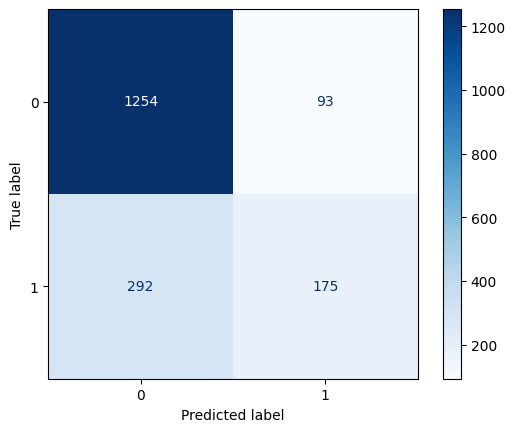

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=modelo_arbol.classes_)
# Dibuja la matriz
disp.plot(cmap=plt.cm.Blues)

# Muestra el gráfico
plt.show()

### Modelo kNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [53]:
X_test_normalizado = normalizacion.transform(X_test)

In [54]:
knn.score(X_test_normalizado, y_test)

0.7557883131201764

In [55]:
datos1

,onehotencoder__internet_InternetService_DSL,onehotencoder__internet_InternetService_Fiber optic,onehotencoder__internet_InternetService_No,onehotencoder__account_Contract_Month-to-month,onehotencoder__account_Contract_One year,onehotencoder__account_Contract_Two year,onehotencoder__account_PaymentMethod_Bank transfer (automatic),onehotencoder__account_PaymentMethod_Credit card (automatic),onehotencoder__account_PaymentMethod_Electronic check,onehotencoder__account_PaymentMethod_Mailed check,...,remainder__phone_MultipleLines,remainder__internet_OnlineSecurity,remainder__internet_OnlineBackup,remainder__internet_DeviceProtection,remainder__internet_TechSupport,remainder__internet_StreamingTV,remainder__internet_StreamingMovies,remainder__account_PaperlessBilling,remainder__account_Charges_Monthly,remainder__account_Charges_Total
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90
7252,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70
7253,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75
7254,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65


In [56]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   onehotencoder__internet_InternetService_DSL                     7256 non-null   float64
 1   onehotencoder__internet_InternetService_Fiber optic             7256 non-null   float64
 2   onehotencoder__internet_InternetService_No                      7256 non-null   float64
 3   onehotencoder__account_Contract_Month-to-month                  7256 non-null   float64
 4   onehotencoder__account_Contract_One year                        7256 non-null   float64
 5   onehotencoder__account_Contract_Two year                        7256 non-null   float64
 6   onehotencoder__account_PaymentMethod_Bank transfer (automatic)  7256 non-null   float64
 7   onehotencoder__account_PaymentMethod_Credit card (a

In [57]:
datos1 = datos1.copy()

In [58]:
# Renombra las columnas eliminando los prefijos
datos1.columns = datos1.columns.str.replace('onehotencoder__', '', regex=False).str.replace('remainder__', '', regex=False)

In [59]:
datos1

,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_Month-to-month,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check,...,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90
7252,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70
7253,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75
7254,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65


### Modelo random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [62]:
# 1. Instanciar el modelo
# n_estimators: número de árboles en el bosque (por defecto es 100)
# random_state: asegura que los resultados sean reproducibles
modelo_rf = RandomForestClassifier(n_estimators=10, random_state=5)

In [63]:
# 2. Entrenar el modelo con los datos de entrenamiento
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=5)

In [64]:
# 3. Evaluar el modelo
# Obtener la precisión (score) del modelo en el conjunto de prueba
score_rf = modelo_rf.score(X_test, y_test)
print(f"La precisión del modelo Random Forest es: {score_rf}")

La precisión del modelo Random Forest es: 0.7955902618282039


In [65]:
# 4. Genera las predicciones del modelo en el conjunto de prueba
predicciones_rf = modelo_rf.predict(X_test)

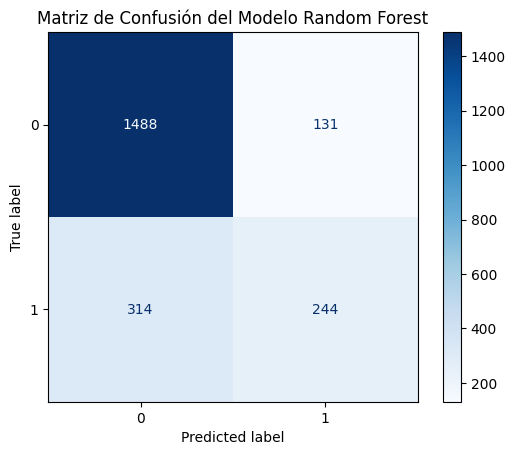

In [66]:
# 5. Crea y visualiza la matriz de confusión
matriz_confusion_rf = confusion_matrix(y_test, predicciones_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_rf, display_labels=modelo_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión del Modelo Random Forest')
plt.show()

In [67]:
from sklearn.metrics import classification_report

# Genera las predicciones con tu modelo entrenado
predicciones_rf = modelo_rf.predict(X_test)

# Muestra el reporte de clasificación
print(classification_report(y_test, predicciones_rf))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1619
           1       0.65      0.44      0.52       558

    accuracy                           0.80      2177
   macro avg       0.74      0.68      0.70      2177
weighted avg       0.78      0.80      0.78      2177



# Analisis

## Introduccion
Este informe presenta los resultados del entrenamiento y evaluación de dos modelos de clasificación, un Árbol de Decisión y un Random Forest, para predecir una variable objetivo 'Churn' o desvinculacion de una compañia telefonica. El análisis se enfoca en comparar el rendimiento de ambos modelos, prestando especial atención a la precisión de la clasificación de la clase minoritaria y la identificación de posibles áreas de mejora.

## Metodologia

Se ha seguido el siguiente flujo de trabajo:

División de Datos: Se dividió el conjunto de datos en un 70% para entrenamiento (X_train, y_train) y un 30% para prueba (X_test, y_test) utilizando la función train_test_split de scikit-learn. Se usó stratify para asegurar que la proporción de clases fuera la misma en ambos subconjuntos, garantizando la consistencia en el entrenamiento y la evaluación.

* Modelos Entrenados: Se entrenaron dos modelos de clasificación:

* Árbol de Decisión (DecisionTreeClassifier).

* Random Forest (RandomForestClassifier).

* Evaluación de Modelos: Se evaluó el rendimiento de ambos modelos utilizando las siguientes métricas:

* Matriz de Confusión: Para visualizar el número de aciertos y errores (verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos).

* Reporte de Clasificación: Para obtener métricas clave como la precisión, el recall y la puntuación F1 para cada clase.

## Analisis y resultados

### Modelo de Árbol de Decisión

La matriz de confusión del Árbol de Decisión mostró los siguientes resultados en el conjunto de prueba:


Verdaderos Negativos (TN): 1181

Falsos Positivos (FP): 166

Falsos Negativos (FN): 247

Verdaderos Positivos (TP): 220

Análisis: El modelo mostró un rendimiento superior al clasificar la clase mayoritaria (Clase 0), pero tuvo un rendimiento deficiente en la clase minoritaria (Clase 1), con un alto número de Falsos Negativos.

### Modelo Random Forest

Tras entrenar el modelo Random Forest, la matriz de confusión mostró un rendimiento mejorado en comparación con el árbol de decisión:

Verdaderos Negativos (TN): 1488

Falsos Positivos (FP): 131

Falsos Negativos (FN): 314

Verdaderos Positivos (TP): 244

Análisis: El Random Forest fue significativamente mejor para clasificar correctamente la clase mayoritaria, reduciendo los Falsos Positivos. Sin embargo, aunque aumentó el número de verdaderos positivos, también incrementó los Falsos Negativos, lo que indica que aún tiene dificultades para identificar correctamente la clase minoritaria.

### Métricas de Clasificación (Random Forest)

El reporte de clasificación para el modelo Random Forest reveló la naturaleza del desbalance de clases y su impacto en el rendimiento.
Métrica	Clase 0	Clase 1
Precisión	0.83	0.65
Recall	0.92	0.44
F1-Score	0.87	0.52

### Análisis de las Métricas:

La precisión general del modelo es del 80%, lo que podría ser engañoso debido al desbalance de las clases.

El bajo recall de 0.44 para la Clase 1 es el principal problema del modelo. Esto significa que de todas las instancias de la Clase 1 que debería haber detectado, solo lo hizo correctamente en el 44% de los casos. Este resultado indica una alta tasa de falsos negativos, lo cual es crítico dependiendo del problema de negocio.

## Conclusiones y recomendaciones

El modelo Random Forest superó al Árbol de Decisión en términos de precisión general y en la clasificación de la clase mayoritaria. Sin embargo, ambos modelos muestran una debilidad significativa en la identificación de la clase minoritaria, lo que se manifiesta en un bajo recall para la Clase 1.

Para mejorar el rendimiento del modelo, se recomienda implementar las siguientes acciones:

* Ajuste de Hiperparámetros con GridSearchCV: Se debe realizar una búsqueda exhaustiva de los mejores parámetros para el RandomForestClassifier. Es crucial incluir el parámetro class_weight='balanced' en esta búsqueda para instruir al modelo a dar más importancia a la clase minoritaria durante el entrenamiento.

* Métrica de Puntuación: Utilizar métricas como el f1-score o recall como criterio de optimización en GridSearchCV en lugar de la precisión (accuracy), ya que son más apropiadas para problemas con desbalance de clases.

* Técnicas de Balanceo de Datos: Evaluar la aplicación de técnicas de sobremuestreo como SMOTE para generar datos sintéticos para la clase minoritaria. Esto podría ayudar a mitigar el desbalance de clases y mejorar significativamente el recall del modelo para la Clase 1.